# **Logistic Regression**
Logistic regression is a way to predict the probability of an event happening or not happening, based on some given data. It’s like trying to guess the outcome of a coin toss, but instead of just flipping a coin, you’re using data to make a more informed decision.
- Key Points - 
 - Logistic regression is used for binary data (data that can only be one of two values, like yes/no or 0/1).
 - It’s a way to predict the probability of an event occurring, based on given data.
 - The formula created by logistic regression is simple and easy to understand, making it a powerful tool for making predictions.

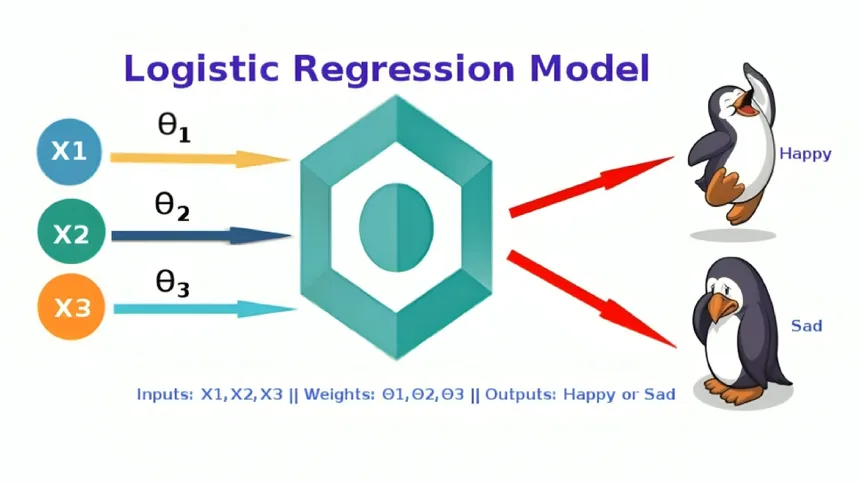

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Generating Categorical Data

In [2]:
X, y = make_classification(
    n_samples=100, # Number of samples to generate.
    n_features=2, # Total number of features (or variables) for each sample.
    n_informative=1, # Out of the 2 features, only 1 feature will be genuinely informative for the classification task. The informative features are the ones that contribute to distinguishing between classes.
    n_redundant=0, # There are no redundant features. Redundant features are combinations of informative features that are used to create new features but do not provide additional information.
    n_classes=2, # The dataset will have 2 classes. This is a binary classification problem.
    n_clusters_per_class=1, # Each class will be represented by a single cluster. This means that the data points for each class will be grouped into one distinct cluster.
    random_state=23, # seed 
    hypercube=False, # If False, the data is not generated from a hypercube but rather from a Gaussian distribution.
    class_sep=10 # Separation between classes.
)

In [3]:
df = pd.DataFrame(X)
df.rename(columns={0: 'X1', 1: 'X2'}, inplace=True)
df['y'] = y
df.head()

,X1,X2,y
0,-4.473951,-1.436281,0
1,-3.965235,0.515680,0
2,-3.904806,0.429005,0
3,-3.939984,0.020888,0
4,7.374444,0.159692,1


## Scatter Plot

In [4]:
category0 = df[df['y'] == 0]
category1 = df[df['y'] == 1]

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = category0['X1'], y = category0['X2'], name = '1st category', mode = 'markers', marker=dict(
        color='red',
    )))
fig.add_trace(go.Scatter(x = category1['X1'], y = category1['X2'], name = '2st category', mode = 'markers', marker=dict(
        color='blue',
    )))
fig.show()

# **Perceptraon Approach**
- The Perceptron algorithm aims to find a hyperplane that separates two classes in the feature space.

- A Perceptron computes a weighted sum of the input features and passes it through an activation function to produce a binary output.

- The Perceptron algorithm iteratively updates the weights based on the classification errors made on the training data.

While the Perceptron algorithm is designed for binary classification, Logistic Regression extends this concept with probabilistic outputs and a more sophisticated loss function.

## Creating our own perceptraon class

In [6]:
class perceptraon:
    def __init__(self, lr, epochs) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = lr
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()

        X_train = np.insert(X_train, 0, 1, axis = 1)

        # Initally declared all the weightes equal to 1, eventually it will get updated
        beta = np.ones(X_train.shape[1]) # Its a metrix including intercept_

        for i in range(self.epochs):
            # Generates random index in dataset
            idx = np.random.randint(0, X_train.shape[0]) 
            
            # Calculating Y predict
            y_hat = 1 if np.dot(X_train[idx], beta) >= 0 else 0 # Result -> 1 or 0
            
            # updating Beta values based or correct or wrong prediction of y_hat
            beta = beta + self.learning_rate * (y_train[idx] - y_hat)*X_train[idx]
        
        # Seperating weights and intercept
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]
    
    def predict(self, X_test):
        return self.intercept_ + np.dot(X_test, self.coef_)

## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = perceptraon(0.01, 1000)
model.fit(X_train, y_train)

## Weights and Bias

In [9]:
print(model.coef_, model.intercept_)

[1. 1.] 1.0


## Calculating Slope(m) and Intercept(b) for plotting Line
- If compare slope point form equation with predictionequation
 - m = -A/B
 - b = -C/B

In [10]:
m = -model.coef_[0]/model.coef_[1]
b = -model.intercept_/model.coef_[1]

## Plotting Best Fit Line which classifies the categories

In [11]:
category0 = df[df['y'] == 0]
category1 = df[df['y'] == 1]

fig = go.Figure()
fig.add_trace(go.Scatter(x = category0['X1'], y = category0['X2'], name = '1st category', mode = 'markers', marker=dict(
        color='red',
    )))
fig.add_trace(go.Scatter(x = category1['X1'], y = category1['X2'], name = '2st category', mode = 'markers', marker=dict(
        color='blue',
    )))
fig.add_trace(go.Scatter(x = df['X1'], y = m*df['X1'] + b, mode = 'lines', name='Line of Classification'))
fig.update_layout(width= 900, height= 500)

fig.update_yaxes(range=[-2.5, 2.7])

fig.show()

# **Perceptron vs. Logistic Regression**
- While the Perceptron algorithm is designed for binary classification, Logistic Regression extends this concept with "probabilistic - SIGMOID FUNCTION" outputs and a more sophisticated "LOSS FUNCTION"

- Due to this loss function Logistic Regression actually able to identify the the perfect Line/Hyperplane at which there is global minima (minimum loss).

- Logistic Regression is a statistical model that estimates probabilities using a logistic function. Unlike the Perceptron, which provides a binary output, Logistic Regression provides a "probability that a given input belongs to a particular class".

# **LogisticRegression - sklearn inbuilt class**

Hyperparameters:

- penalty: regularization
- duel : 
- tol : Tolerance for stopping criteria. (coef_ tolarence)
- C : 
- fit_intercept : Intercept term
- intercept_scaling : 
- class_weight : Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
- solver : seg (Our formula)
- max_iter : 1000
- multi_class : 
- l1_ratio : ElasticNet

In [12]:
model = LogisticRegression(penalty=None,solver='sag')
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(penalty=None, solver='sag')

## Weights and Bias

In [13]:
print(model.intercept_, model.coef_)

[-0.37917948] [[ 2.08663357 -0.02163159]]


## Slope and Intercept for Plotting Best Fit Line

In [14]:
model_m = -model.coef_[0, 0]/model.coef_[0, 1]
model_b = -model.intercept_[0]/model.coef_[0, 1]

## Comparison between Perceptrone Approach and sklearn-class approach

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = category0['X1'], y = category0['X2'], name = '1st category', mode = 'markers', marker=dict(
        color='red',
    )))
fig.add_trace(go.Scatter(x = category1['X1'], y = category1['X2'], name = '2st category', mode = 'markers', marker=dict(
        color='blue',
    )))
fig.add_trace(go.Scatter(x = df['X1'], y = m*df['X1'] + b, mode = 'lines', name='my classifier'))
fig.add_trace(go.Scatter(x = df['X1'], y = model_m*df['X1'] + model_b, mode = 'lines', name='sklearn classifier'))
fig.update_layout(title = "Comparison between Perceptrone Approach and sklearn-class approach", width= 900, height= 500)

fig.update_yaxes(range=[-2.5, 2.7])

fig.show()

As you can see the inbuilt classifier symmetrically classifing where perceptrone approach is not able to do it

# **Logistic Regression using Sigmoid Function**
The sigmoid function maps any real-valued number (Y_HAT) into a value between 0 and 1, which can be interpreted as a probability.
- σ(z) = 1 / 1 + e^(-y_hat)

## Sigmoid Function

In [16]:
def step(value):
    return 1 / (1 + np.exp(-value))

## Creating our own Class

In [17]:
class LR_sigmoid:
    def __init__(self, lr, epochs) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = lr
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()

        X_train = np.insert(X_train, 0, 1, axis = 1)

        beta = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            idx = np.random.randint(0, X_train.shape[0])
            
            # Passing y_hat value into sigmoid function
            y_hat = step(np.dot(X_train[idx], beta))

            beta = beta + self.learning_rate * (y_train[idx] - y_hat)*X_train[idx]
        
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]

In [18]:
model = LR_sigmoid(0.01, 1000)
model.fit(X_train, y_train)

## Weight and Bias

In [19]:
print(model.coef_, model.intercept_)

[1.44801835 0.94961123] 0.8868651106251781


## Slope and Intercept

In [20]:
sigma_m = -model.coef_[0]/model.coef_[1]
sigma_b = -model.intercept_/model.coef_[1]

## Comparison between Perceptrone Approach, Sigmoid Approach and sklearn-class approach

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = category0['X1'], y = category0['X2'], name = '1st category', mode = 'markers', marker=dict(
        color='red',
    )))
fig.add_trace(go.Scatter(x = category1['X1'], y = category1['X2'], name = '2st category', mode = 'markers', marker=dict(
        color='blue',
    )))
fig.add_trace(go.Scatter(x = df['X1'], y = m*df['X1'] + b, mode = 'lines', name='my classifier'))
fig.add_trace(go.Scatter(x = df['X1'], y = model_m*df['X1'] + model_b, mode = 'lines', name='sklearn classifier'))
fig.add_trace(go.Scatter(x = df['X1'], y = sigma_m*df['X1'] + sigma_b, mode = 'lines', name='sigmoid classifier'))
fig.update_layout(title = "Comparison between Perceptrone Approach, Sigmoid Approach and sklearn-class approach", width= 900, height= 500)

fig.update_yaxes(range=[-2.5, 2.7])

fig.show()

## The sigmoid function by itself is not sufficient to predict the perfect line of classification:

- No Optimization: The sigmoid function alone does not provide a mechanism for training the model. Logistic Regression requires an optimization process to find the best weights and bias.

- No Loss Function: The sigmoid function outputs probabilities but does not measure the accuracy of the model. Logistic Regression uses a loss function to quantify the difference between predicted probabilities and actual outcomes.

# **Logistic Regression using Gradient Descent**
- Process:
 - Initialize weights and bias.
 - Compute the linear combination of features.
 - Apply the sigmoid function to get probabilities.
 - Update weights and bias using the gradient of the loss function.
 - Repeat until the model converges or for a set number of epochs.
 - Predict class labels based on the probabilities.

## Sigmoid Function

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Creating our own class

In [23]:
class GradientDescent:
    def __init__(self, lr=0.01, epochs=1000) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = lr
    
    def fit(self, X_train, y_train):
        # Convert inputs to numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()  # Ensure y_train is a 1D array
        
        # Add intercept term to X_train
        X_train = np.insert(X_train, 0, 1, axis=1)
        
        # Initialize beta with ones
        beta = np.zeros(X_train.shape[1])  # Better to initialize with zeros

        for epoch in range(self.epochs):
            # Compute the predicted values
            y_hat = sigmoid(np.dot(X_train, beta)) 

            # Compute the gradient
            gradient = np.dot((y_train - y_hat), X_train) / X_train.shape[0]

            # Update beta
            beta += self.learning_rate * gradient
        
        # Extract coefficients and intercept
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]

In [24]:
model = GradientDescent(0.01, 600)
model.fit(X_train, y_train)

## Weights and Bias

In [25]:
print(model.coef_, model.intercept_)

[1.00202838 0.00501293] -0.12844758408022613


## Slope and Intercept of the Best Fit Line

In [26]:
gd_m = -model.coef_[0]/model.coef_[1]
gd_b = -model.intercept_/model.coef_[1]

## Comparing All Approaches

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = category0['X1'], y = category0['X2'], name = '1st category', mode = 'markers', marker=dict(
        color='red',
    )))
fig.add_trace(go.Scatter(x = category1['X1'], y = category1['X2'], name = '2st category', mode = 'markers', marker=dict(
        color='blue',
    )))
fig.add_trace(go.Scatter(x = df['X1'], y = m*df['X1'] + b, mode = 'lines', name='my classifier'))
fig.add_trace(go.Scatter(x = df['X1'], y = model_m*df['X1'] + model_b, mode = 'lines', name='sklearn classifier'))
fig.add_trace(go.Scatter(x = df['X1'], y = sigma_m*df['X1'] + sigma_b, mode = 'lines', name='sigmoid classifier'))
fig.add_trace(go.Scatter(x = df['X1'], y = gd_m*df['X1'] + gd_b, mode = 'lines', name='gd classifier'))
fig.update_layout(title="Comparing All Approaches", width= 900, height= 500)

fig.update_yaxes(range=[-2.5, 2.7])

fig.show()

## Now you can see the line of inbuilt sklearn class and Gradient Descent class are very close to each other
you can even improve the performance of the model by tuning the hypermeters (no. of epochs and Learning Rate)